# Tutorial 3

In last tutorial we saw some Data Science Libraries in Python. They were : Pandas,numpy, matplotlib. In this tutorial, we will apply all the previous concepts discussed in last tutorial on one of the famous Data Science Data Sets: Iris Data Set.In particular we will cover following steps in this tutorial 

- Data Uploading through Pandas
- Explore data by Visualization
- Modelling using Decision Trees Classifier
- Results 

Apart from this, we will also explore Scikit learn, an open source library for Data Analysis and Modelling. So let's get started.




### Importing Libraries 

In [2]:
import pandas as pd                                  #for data analysis
import matplotlib.pyplot as plt                      #for visualization
import seaborn as sns                                #for visualization
from sklearn.model_selection import train_test_split #train test split for modelling
from sklearn.tree import DecisionTreeClassifier      #importing the model
from sklearn.metrics import accuracy_score           #to measure accuracy

### Loading Data from CSV to Pandas DataFrame 

In [2]:
data = pd.read_csv("iris.csv")

In [3]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
print("The shape of data is : ", data.shape)
print("There are" , data.shape[0], "rows and", data.shape[1] ,  "attributes in iris data set" )

The shape of data is :  (150, 5)
There are 150 rows and 5 attributes in iris data set


### Exploring Data 

To make our visualizations more appealing I used Seaborn, a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

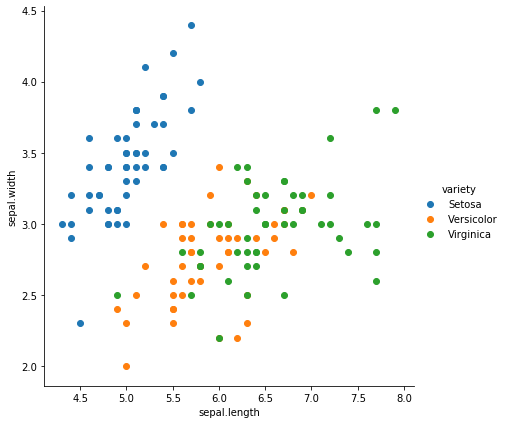

In [5]:
graph = sns.FacetGrid(data, hue="variety", height=6)
graph.map(plt.scatter, "sepal.length", "sepal.width") 
graph.add_legend()

We can look at an individual feature in Seaborn through many different kinds of plots. Here is a boxplot 

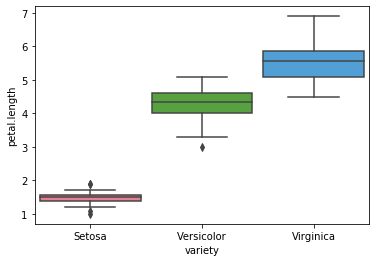

In [6]:
sns.boxplot(x="variety", y="petal.length", palette="husl", data=data ,width = 0.9)

We see the length of different species in this plot. It helps us analysing that lengths of Setosas are in range 1 and 2 cm, while versicolor grow about 5 cm and Virginica grow upto 7 cm long

### Exploring Variety Attribute

Let's first check how the distribution of variety attribute by first selecting variety attribute and use .value_counts() method.

In [7]:
data["variety"].value_counts()

Virginica     50
Versicolor    50
Setosa        50
Name: variety, dtype: int64

We see a that our class attribute is fairly distributed.

In [9]:
#convert variety attribute from object dtype to category
data["variety"] = data["variety"].astype('category')
#convert vareity Attribute to 0 for Setosa,1 for Versicolor and 2 for Virginica
#Categorical Encoding
data["variety"] = data["variety"].cat.codes

In [10]:
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
#seperate dependent and independent attributes
Independent = data.drop("variety",axis =1)
Dependent   = data["variety"]

In [12]:
print("The shape of Independent Attributes are  :",Independent.shape)
print("The shape of Dependent Attribute is  :" ,Dependent.shape)

The shape of Independent Attributes are  : (150, 4)
The shape of Dependent Attribute is  : (150,)


In [13]:
Independent

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
Dependent

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: variety, Length: 150, dtype: int8

We will now try to Model using Decision Trees Algorithm. But before that we need to split our data randomly. This is done so that the algorithm is trained on training data and is tested on unseen data. For this we will use Sci-kit learn Train-Test split and I will randomly split  data in (80-20) ratio, that is 80% for training data and 20% for testing data.

### Train-Test Split 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(Independent,Dependent , test_size=0.2, random_state=11)

In [16]:
X_train

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
120,6.9,3.2,5.7,2.3
122,7.7,2.8,6.7,2.0
49,5.0,3.3,1.4,0.2
29,4.7,3.2,1.6,0.2
...,...,...,...,...
76,6.8,2.8,4.8,1.4
13,4.3,3.0,1.1,0.1
81,5.5,2.4,3.7,1.0
91,6.1,3.0,4.6,1.4


In [17]:
y_train

0      0
120    2
122    2
49     0
29     0
      ..
76     1
13     0
81     1
91     1
80     1
Name: variety, Length: 120, dtype: int8

### Model Training Using Decision Tree

Now we fit the Algorithm on our Training Data **Only** 

In [18]:
algorithm = DecisionTreeClassifier(random_state=0)
algorithm.fit(X_train,y_train)
print("Training....")

Training....


Now as training of the data is complete we can move towards prediction part. First let's see our 20 % of test data

In [19]:
X_test

,sepal.length,sepal.width,petal.length,petal.width
112,6.8,3.0,5.5,2.1
145,6.7,3.0,5.2,2.3
133,6.3,2.8,5.1,1.5
56,6.3,3.3,4.7,1.6
111,6.4,2.7,5.3,1.9
9,4.9,3.1,1.5,0.1
65,6.7,3.1,4.4,1.4
15,5.7,4.4,1.5,0.4
30,4.8,3.1,1.6,0.2
63,6.1,2.9,4.7,1.4


In [20]:
print("The shape for Independent Values is" , X_test.shape)
print("The shape for Dependent Values is" ,y_test.shape)

The shape for Independent Values is (30, 4)
The shape for Dependent Values is (30,)


### Test on Unseen data 

In [21]:
print("generating predictions...")
y_prediction=algorithm.predict(X_test)

generating predictions...


In [22]:
y_prediction

array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1], dtype=int8)

Now let's check the true values 

In [23]:
y_test

112    2
145    2
133    2
56     1
111    2
9      0
65     1
15     0
30     0
63     1
119    2
62     1
84     1
113    2
139    2
41     0
103    2
66     1
110    2
142    2
69     1
2      0
22     0
51     1
12     0
11     0
149    2
75     1
16     0
85     1
Name: variety, dtype: int8

It looks like that most of the values are predicted accurately but we need a **metric**. Let's check the accuracy of the Classifier on test data

In [24]:
print("The accuracy of classifier on test data is : ", accuracy_score(y_test, y_prediction))

The accuracy of classifier on test data is :  0.9333333333333333


### END 